In [2]:
pip install pyreadr pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr
import os
import numpy as np

In [4]:
def load_rda(file_paths):

  dataframes = {}

  for file_path in file_paths:
      result = pyreadr.read_r(file_path)

      for key in result.keys():
          dataframes[key] = result[key]

  return dataframes

In [5]:
def missing_values(df):
  return(df.isnull().sum())

In [6]:
import pandas as pd

def outlier_values(df):
    outliers = pd.Series(dtype="float64")

    for col in df.select_dtypes(include=["number"]):  
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = mask.mean() * 100  
    return outliers


In [7]:
def plot_variable_distributions(dataframe, output_dir="plots"):
    os.makedirs(output_dir, exist_ok=True)

    num_colors = len(dataframe.select_dtypes(include='number').columns)
    colors = sns.color_palette("husl", n_colors=num_colors)

    for i, column in enumerate(dataframe.select_dtypes(include='number').columns):
        plt.figure(figsize=(10, 6))
        sns.histplot(dataframe[column], kde=True, 
                     color=colors[i], edgecolor="black", alpha=0.5,  
                     line_kws={"linewidth": 2})  
        plt.title(f"Distribution de {column}")
        plt.xlabel(column)
        plt.ylabel("Fréquence")
        plt.show()  

    for column in dataframe.select_dtypes(include='category').columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index, palette="Set2")
        plt.title(f"Distribution de {column}")
        plt.xlabel("Fréquence")
        plt.ylabel(column)
        plt.show()  


In [8]:
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include='number').columns
    plt.figure(figsize=(15, 10))

    # Créer un boxplot pour chaque variable numérique
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()


In [9]:
def clean_data(data_dict):
    cleaned_dict = {}
    for key, df in data_dict.items():
        df_cleaned = df.drop_duplicates()
        if 'RecordBeg' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordBeg'] = pd.to_datetime(df_cleaned['RecordBeg'], errors='coerce')
        if 'RecordEnd' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordEnd'] = pd.to_datetime(df_cleaned['RecordEnd'], errors='coerce')

        cleaned_dict[key] = df_cleaned

    return cleaned_dict

In [10]:
file_paths = ['euMTPL.rda']

In [11]:
df = load_rda(file_paths)

In [12]:
df1=clean_data(df)

In [13]:
euMTPL_df=df1['euMTPL']
euMTPL_df

,policy_id,group,fuel_type,year,vehicle_category,vehicle_use,province,horsepower,gender,age,exposure,cost_nc,num_nc,cost_cg,num_cg,cost_fcg,num_fcg,cost_cd,num_cd
0,1,test,B,7.0,1,1,PA,14,M,77,0.487671,0.0,0,0.0,0,0.0,0,0.0,0
1,2,train,B,7.0,1,1,NA,12,M,40,0.019178,0.0,0,0.0,0,0.0,0,0.0,0
2,4,train,B,7.0,1,1,CN,14,M,75,0.032877,0.0,0,0.0,0,0.0,0,0.0,0
3,5,train,B,7.0,1,1,NA,13,M,48,0.043836,0.0,0,0.0,0,0.0,0,0.0,0
4,6,train,B,7.0,1,1,NA,12,F,54,0.046575,0.0,0,0.0,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373192,2595210,test,B,9.0,1,1,RM,14,F,40,0.246575,0.0,0,0.0,0,0.0,0,0.0,0
2373193,2595211,train,B,9.0,1,1,LE,14,M,52,0.756164,0.0,0,0.0,0,0.0,0,0.0,0
2373194,2595212,test,E,9.0,1,1,LE,1,F,46,0.008219,0.0,0,0.0,0,0.0,0,0.0,0
2373195,2595213,test,T,9.0,1,1,LE,15,M,25,0.723288,0.0,0,0.0,0,0.0,0,0.0,0


In [14]:
outlier_values(euMTPL_df )

policy_id     0.000000
year          0.000000
horsepower    1.435532
age           0.044286
exposure      0.000000
cost_nc       1.509525
num_nc        1.504468
cost_cg       4.069995
num_cg        4.069405
cost_fcg      4.069405
num_fcg       4.069405
cost_cd       3.267112
num_cd        3.267112
dtype: float64

Du tableau ci-dessus, on remarque la majorité des variables ont des valeurs aberrantes. Les variables **policy_id**, **year** et **exposure** sont ceux ne comportant pas d'outliers. Ces valeurs aberrantes sont en de très faible proportion comprise entre **0%** et **4.07%**.

## Statistique descriptives 

In [15]:
euMTPL_df.describe().round(2)

,policy_id,year,horsepower,age,exposure,cost_nc,num_nc,cost_cg,num_cg,cost_fcg,num_fcg,cost_cd,num_cd
count,2373197.00,2373197.00,2373197.00,2373197.00,2373197.00,2373197.00,2373197.00,2373197.00,2373197.00,2373197.00,2373197.00,2373197.00,2373197.00
mean,1290069.90,8.00,16.52,48.17,0.63,85.32,0.02,80.19,0.04,78.04,0.04,62.34,0.03
std,750483.24,0.82,4.56,14.51,0.35,3812.30,0.13,634.01,0.21,456.06,0.21,448.10,0.20
min,1.00,7.00,0.00,18.00,0.00,-10343.09,0.00,-1457.20,0.00,0.00,0.00,0.00,0.00
25%,641820.00,7.00,14.00,37.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1280437.00,8.00,16.00,46.00,0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1939574.00,9.00,19.00,59.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2595214.00,9.00,999.00,109.00,1.00,1450118.00,8.00,100086.24,6.00,88974.70,5.00,132838.00,19.00


In [16]:
euMTPL_df.describe(include = 'category')

,fuel_type,vehicle_category,vehicle_use,province,gender
count,2373197,2373197,2373197,2373197,2373197
unique,8,2,5,108,2
top,B,1,1,MI,M
freq,1382612,2360481,2359462,189291,1479849


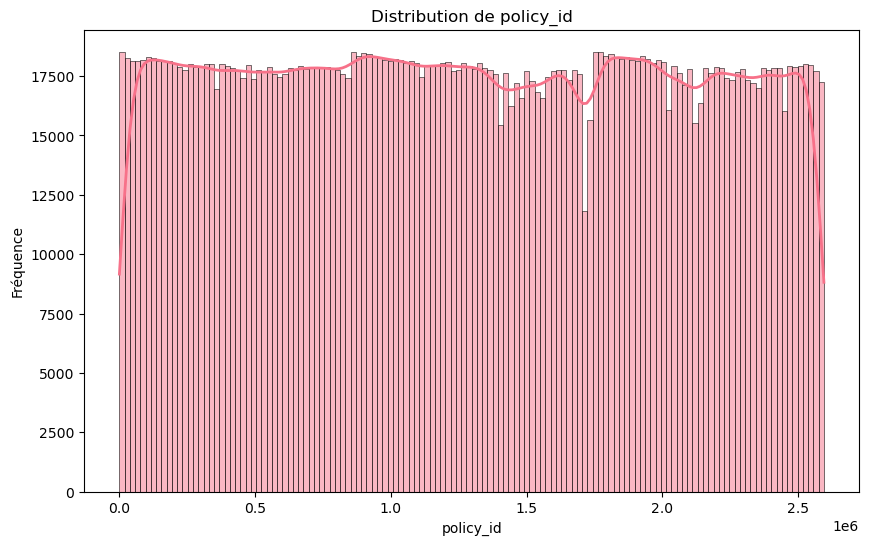

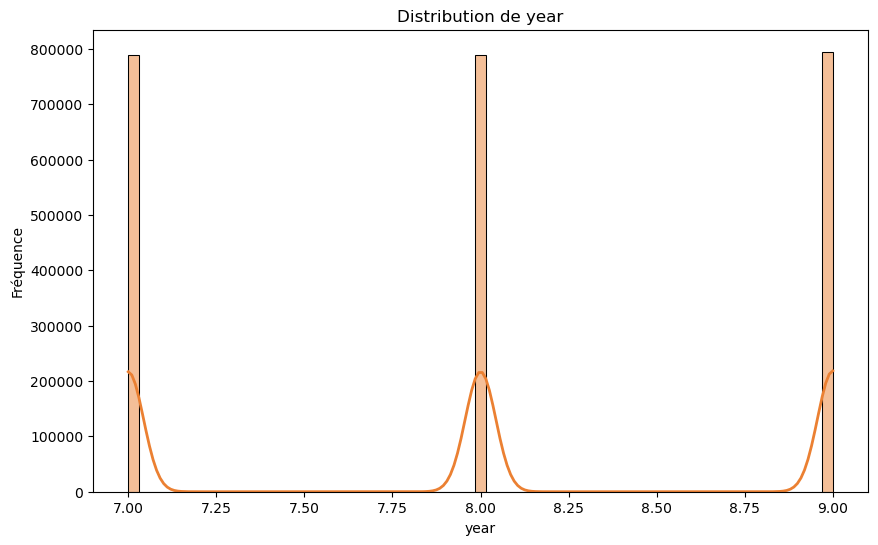

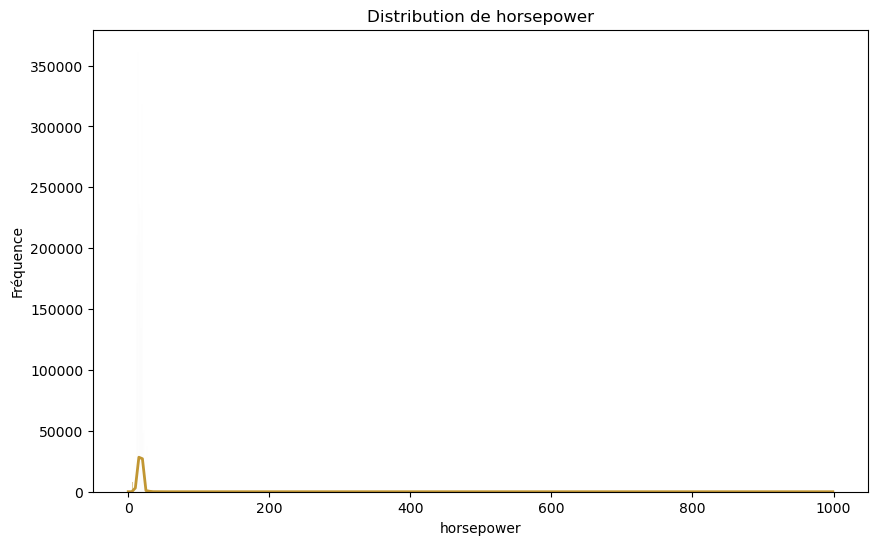

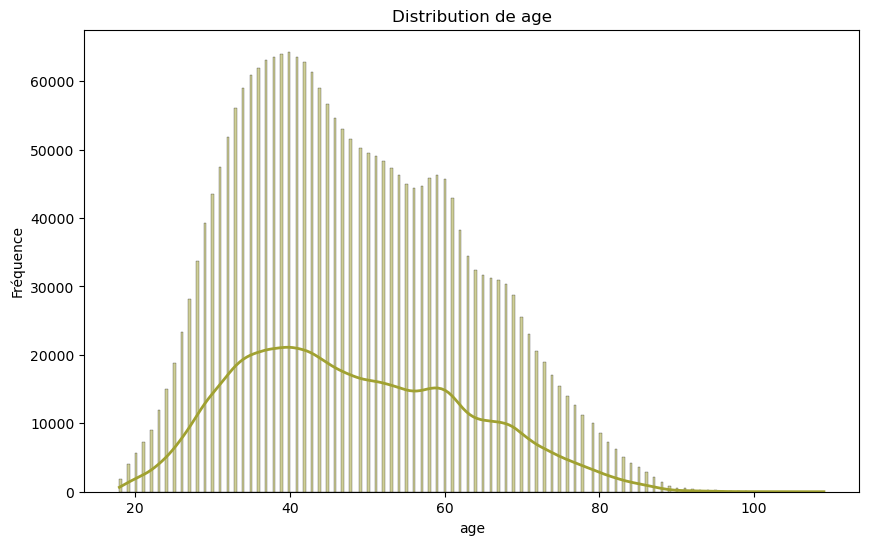

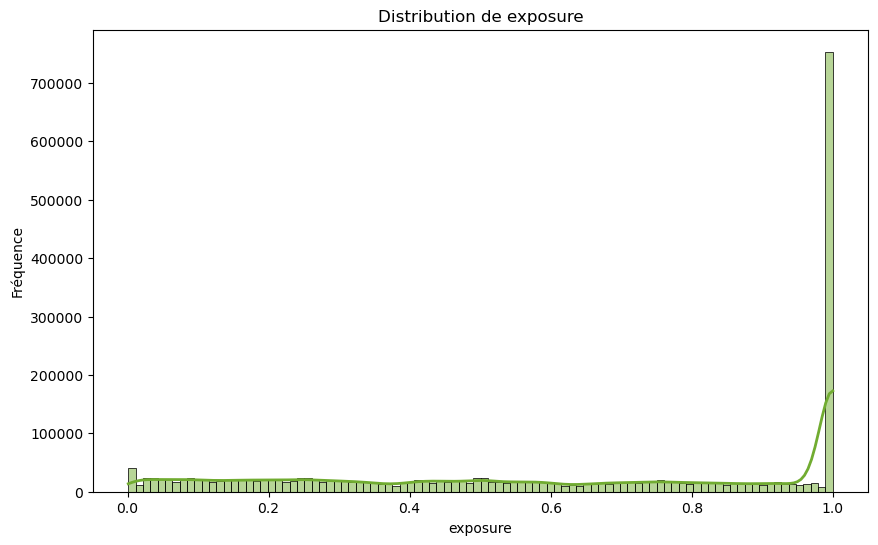

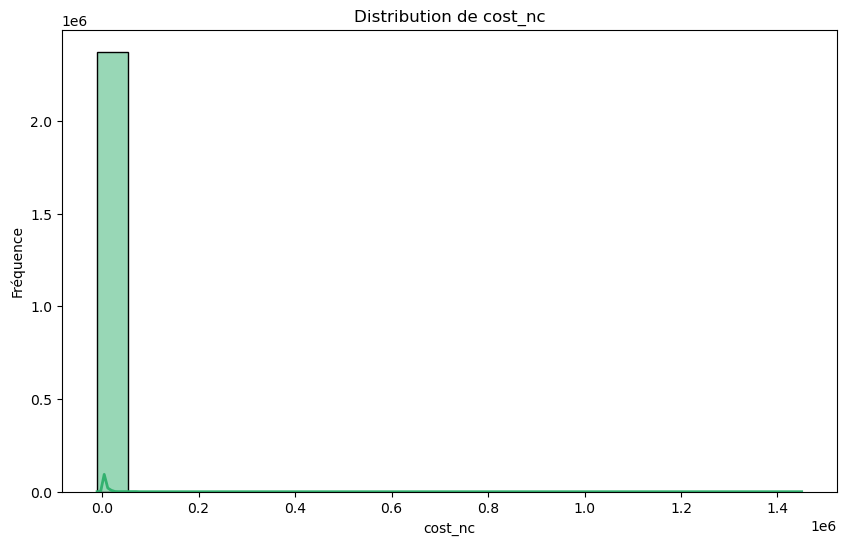

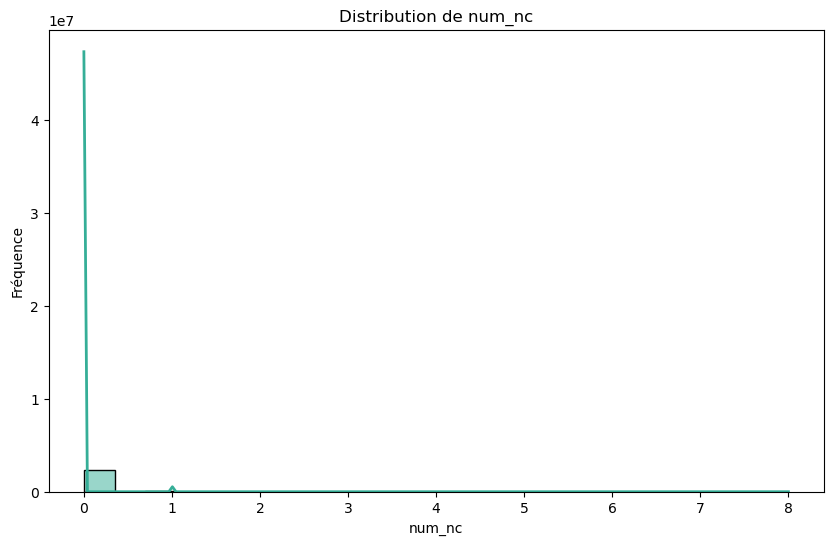

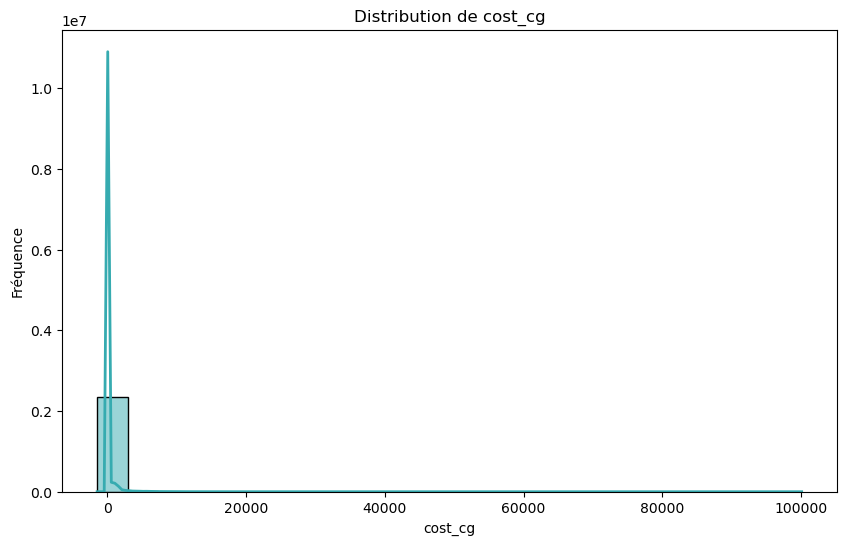

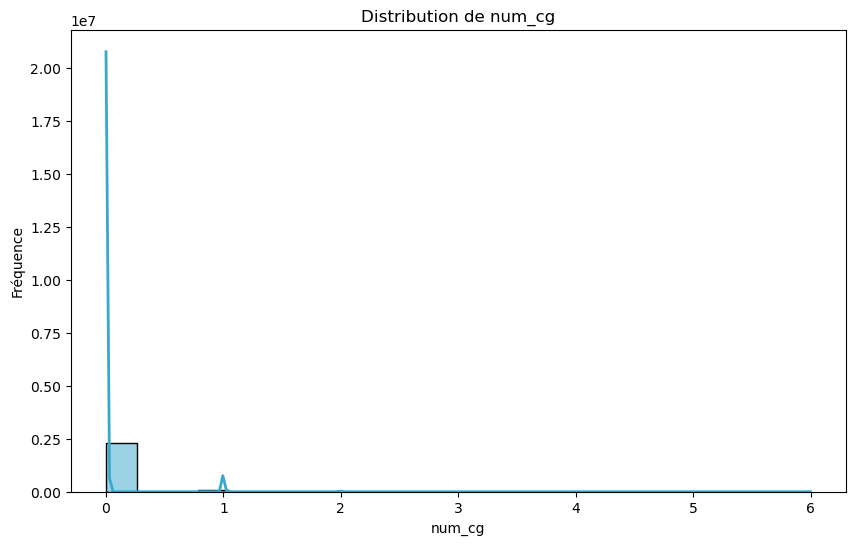

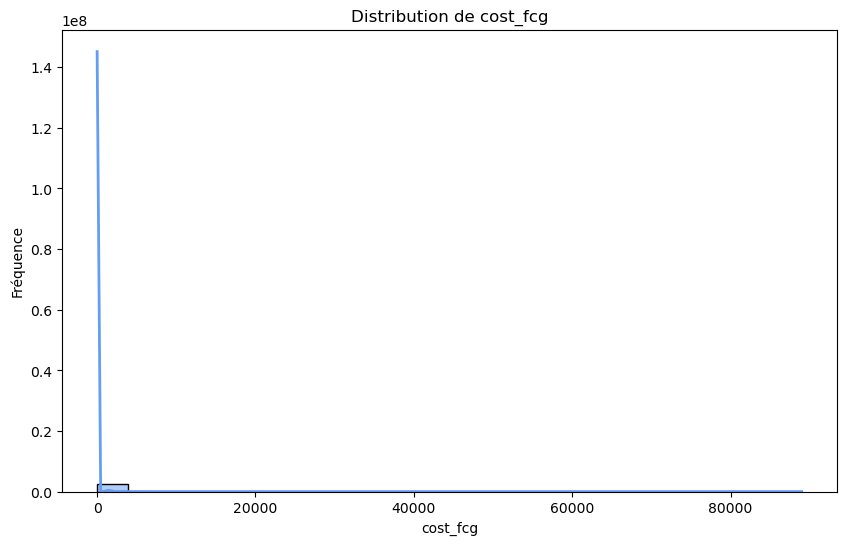

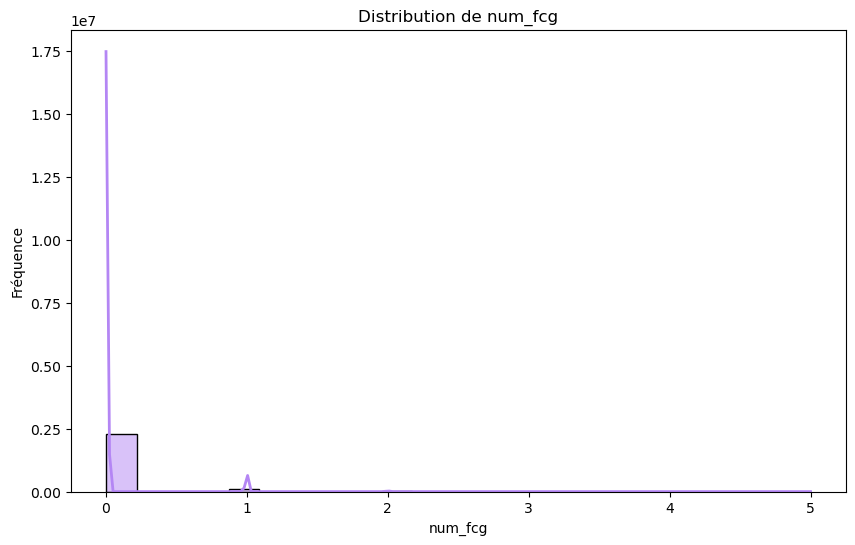

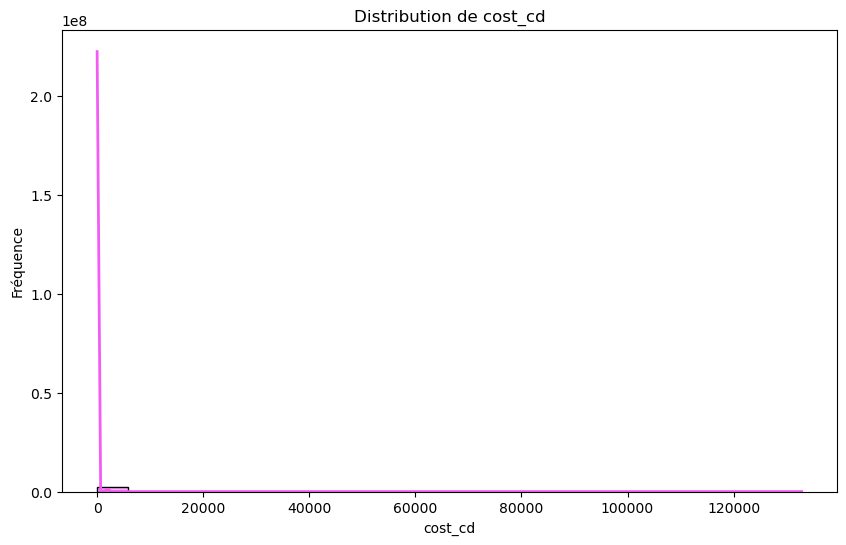

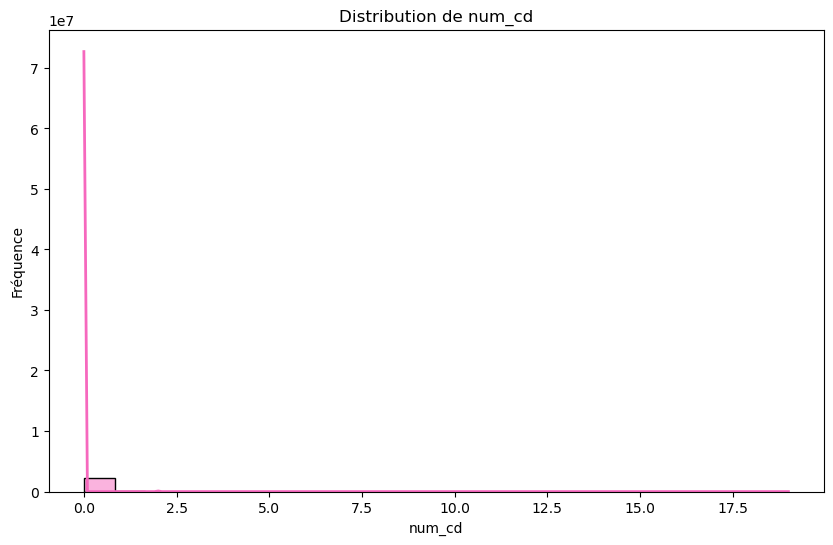

/tmp/ipykernel_14023/785512428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index, palette="Set2")


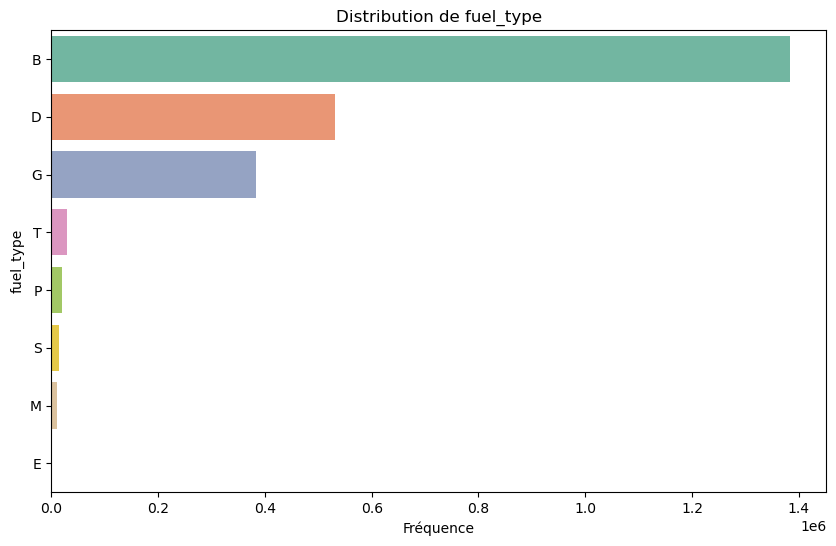

/tmp/ipykernel_14023/785512428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index, palette="Set2")


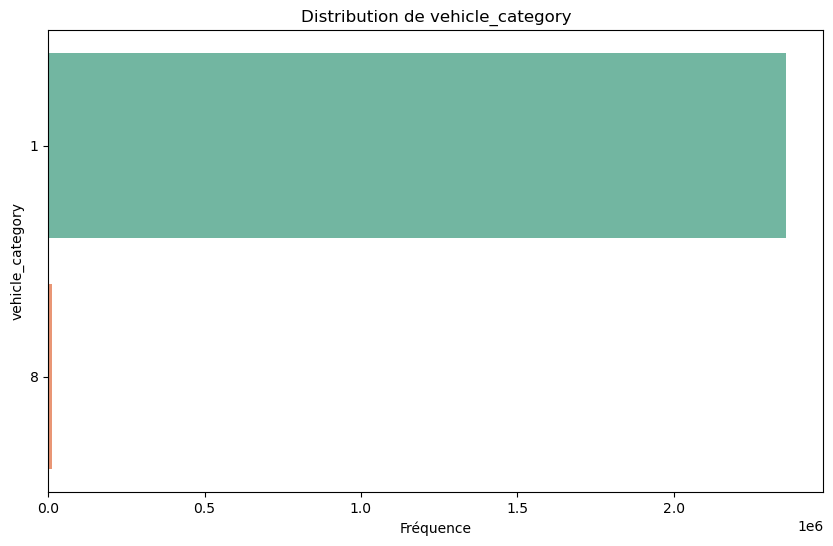

/tmp/ipykernel_14023/785512428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index, palette="Set2")


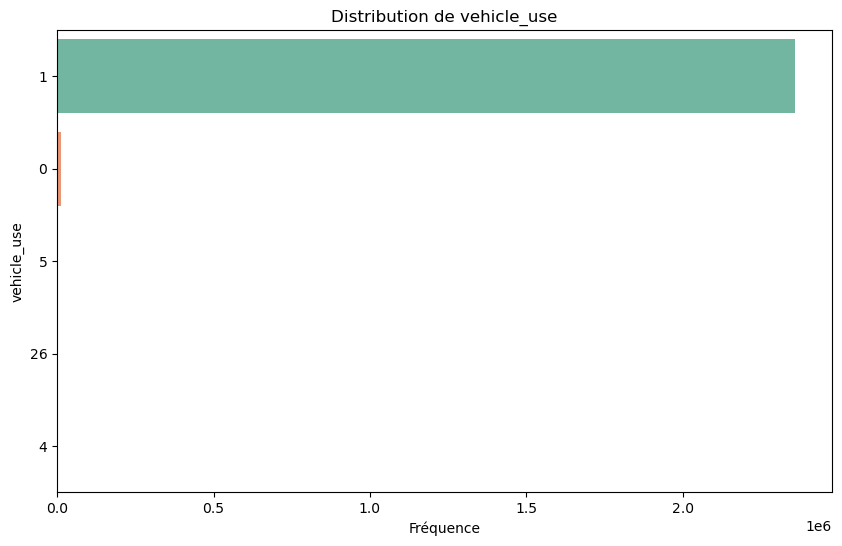

/tmp/ipykernel_14023/785512428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index, palette="Set2")


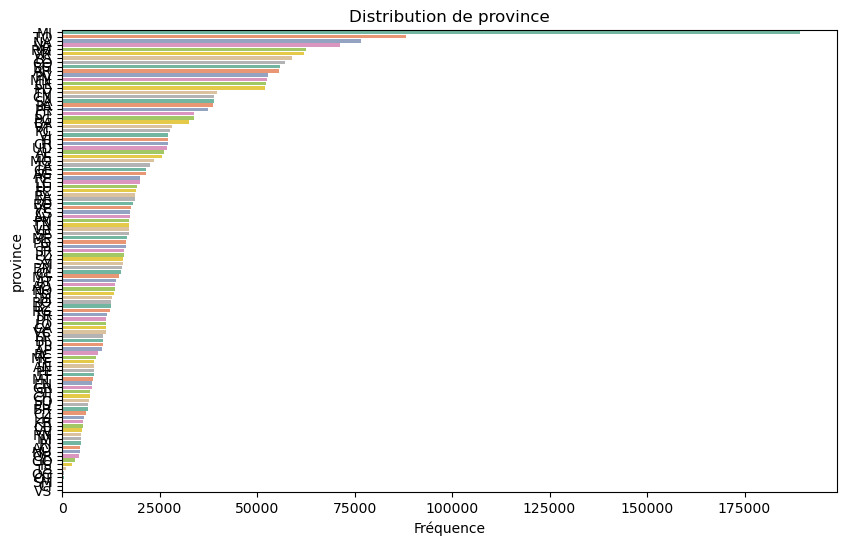

/tmp/ipykernel_14023/785512428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index, palette="Set2")


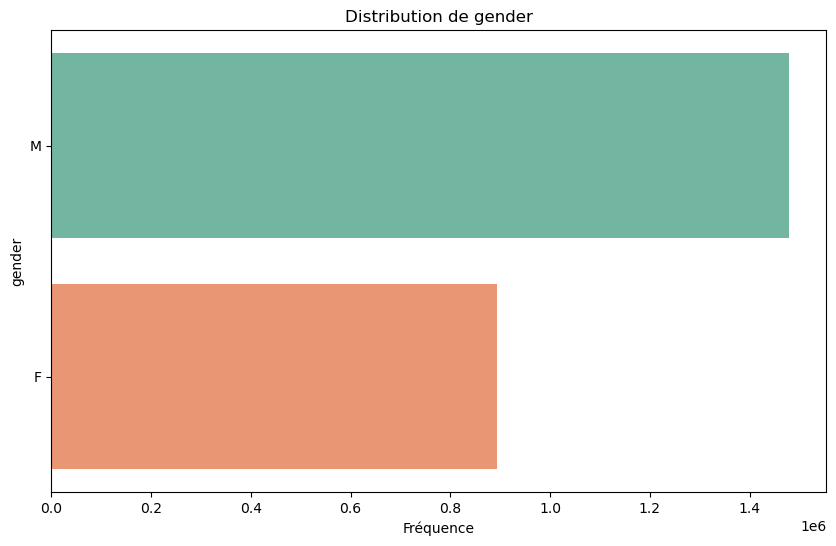

In [17]:
plot_variable_distributions(euMTPL_df)

In [18]:
euMTPL_df.select_dtypes(include='number').columns


Index(['policy_id', 'year', 'horsepower', 'age', 'exposure', 'cost_nc',
       'num_nc', 'cost_cg', 'num_cg', 'cost_fcg', 'num_fcg', 'cost_cd',
       'num_cd'],
      dtype='object')

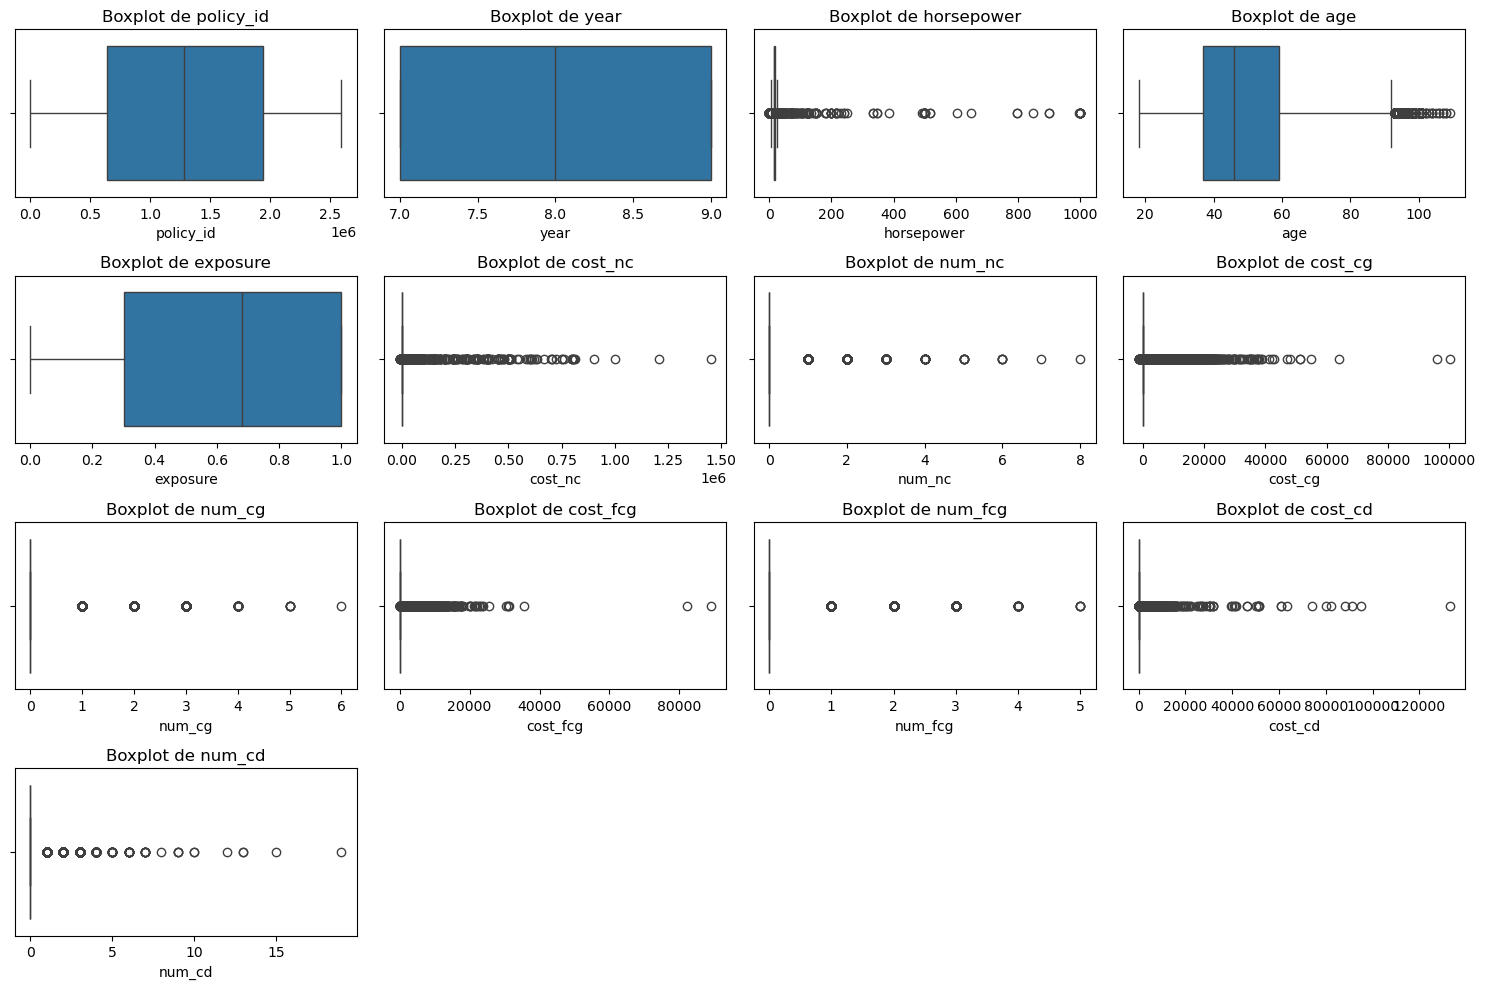

In [19]:
plot_boxplots(euMTPL_df)

### RÉSUMÉ 

## Variables numériques
**year** : La moyenne est **8**, et elle varie entre **7 et 9**.  
**horsepower** : La moyenne est **16.52**, avec un minimum de **0** et un maximum de **999**.
**age** : La moyenne est **48.17 ans**, avec un minimum de **18 ans** et un maximum de **109 ans**.  
**exposure** : La moyenne de **0.63** et un maximum de **1**.  
**cost_hc** :  La moyenne est **85.32**, mais la valeur minimale est **-10,343.09**.
**cost_cg** : La moyenne est **80.19**, mais la valeur minimale est **-1,457.20**.
**cost_tcg** : La moyenne est **78.04**, avec un maximum de **88,974.70**.  
**num_tcg** : La moyenne est **0.03**, avec un maximum de **5**.  
**cost_cd** : Moyenne de **62.34**, maximum de **132,838.00**.  
**num_cd** : Moyenne de **0.03**, maximum de **19**.  

## Variables catégorielles 
**fuel_type** : la plus fréquente est **B** (**1,382,612 occurrences**).  
**vehicle_category** : la plus fréquente est **1**.  
**vehicle_use** : la plus fréquente est **1**.  
**province** : la plus fréquente est **MI** (Milan).  
**gender**(**M/F**): la majorité sont des **hommes (1,479,849)**.  
